## The purpose of this document is to predict the attendance of baseball attendance given the promotions that are available at the time of the games. 

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dodgers.csv')  

In [3]:
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


In [4]:
#The month with the lowest attendance is June
df.groupby(["month"])["attend"].sum()

month
APR    475103
AUG    641273
JUL    526611
JUN    431464
MAY    672223
OCT    110111
SEP    467461
Name: attend, dtype: int64

<AxesSubplot:>

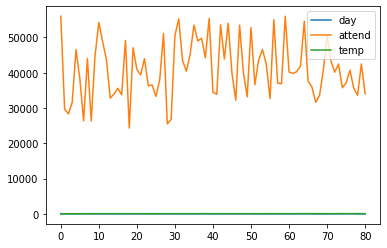

In [5]:
df.plot()

In [7]:
df.groupby(["day_of_week"])["attend"].sum()

day_of_week
Friday       521520
Monday       419588
Saturday     559948
Sunday       549495
Thursday     202037
Tuesday      620636
Wednesday    451022
Name: attend, dtype: int64

<AxesSubplot:xlabel='day_of_week', ylabel='attend'>

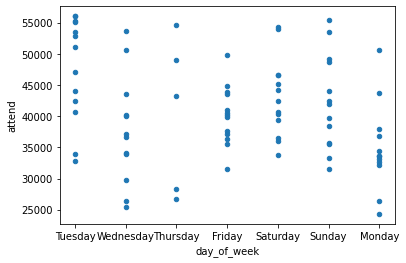

In [8]:
#Scatter Plot
df.plot(x='day_of_week',y='attend',kind='scatter')

In [9]:
day = df.groupby(['day_of_week']).sum().reset_index()
month = df.pivot(index='month',columns='attend',values='attend')

In [10]:
opponent = df.groupby(['opponent']).sum().reset_index()

In [11]:
opponent

,opponent,day,attend,temp
0,Angels,36,149332,201
1,Astros,78,106150,190
2,Braves,72,96735,187
3,Brewers,118,141435,286
4,Cardinals,115,285973,554
5,Cubs,12,132620,229
6,Giants,93,353667,694
7,Marlins,75,121996,222
8,Mets,88,198345,300
9,Nationals,84,147802,211


In [12]:
# Encoding No = 0, Yes = 1
for col in list(df.columns)[-6:]: 
    df[col]= df[col].apply(lambda x: 0 if x== 'NO' else 1)

In [13]:
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,1,1,0,0,0,0
1,APR,11,29729,Wednesday,Pirates,58,1,1,0,0,0,0
2,APR,12,28328,Thursday,Pirates,57,1,1,0,0,0,0
3,APR,13,31601,Friday,Padres,54,1,1,0,0,1,0
4,APR,14,46549,Saturday,Padres,57,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,1,1,0,0,0,0
77,SEP,30,35607,Sunday,Rockies,95,1,1,0,0,0,0
78,OCT,1,33624,Monday,Giants,86,1,1,0,0,0,0
79,OCT,2,42473,Tuesday,Giants,83,1,1,0,0,0,0


**Discussion:**

Based off days of week, we used scatter plots and encoding to arrive at what we determined to be the lowest days of attendance. The results were heavier concentration of lower attendance on Monday and Wednesdays. 

Based off the promotional activities, we used the box plots to figure out what attendance looks like with `days_of_week` and `cap` to `bubblehead`. The outcomes where that attendance was highest when there was a shirt or bubblehead promotional item provided. 


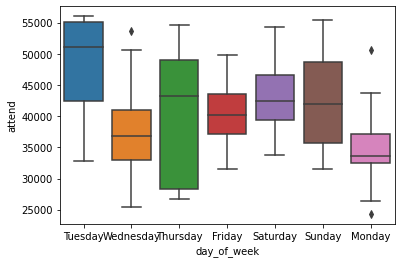

In [18]:
sns.boxplot (x= 'day_of_week', y='attend', data =df)
plt.show()

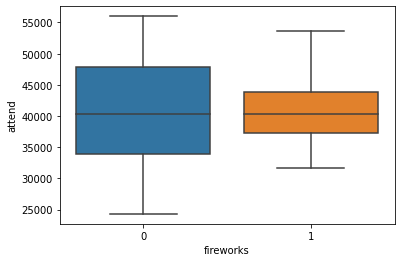

In [19]:
sns.boxplot (x= 'fireworks', y='attend', data =df)
plt.show()

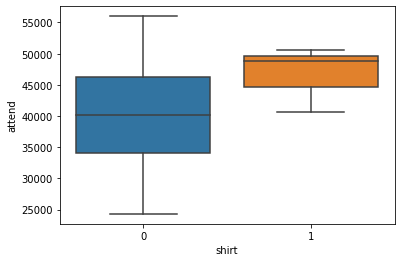

In [20]:
sns.boxplot (x= 'shirt', y='attend', data =df)
plt.show()

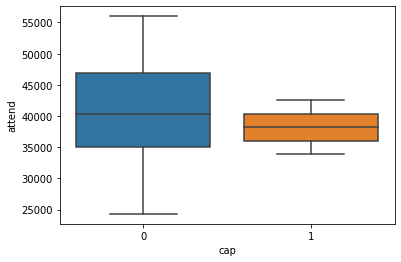

In [21]:
sns.boxplot (x= 'cap', y='attend', data =df)
plt.show()

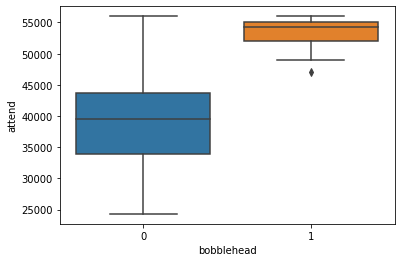

In [22]:
sns.boxplot (x= 'bobblehead', y='attend', data =df)
plt.show()

**Discussion:** 

Based off the exploratory data analysis, we determined that Monday and Wednesdays had the lowest concentration of attendance. By evaluating the promotional items, we determined that the days that attendance overall were highest included a free shirt or bobble head. Therefore, we plan to evaluate how many units of change a shirt or bubblehead has on attendance.  To arrive at this, we are going to utilize Wednesday by dropping the outliers and pulling into a regression model of attendance and shirt/bubblehead.  


In [67]:
df1 = df[df['day_of_week']=='Monday']

In [68]:
Monday

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
6,APR,23,26376,Monday,Braves,60,1,1,0,0,0,0
12,MAY,7,43713,Monday,Giants,67,1,1,0,0,0,0
18,MAY,14,24312,Monday,Snakes,67,1,1,0,0,0,0
26,MAY,28,38016,Monday,Brewers,73,1,1,0,0,0,0
30,JUN,11,50559,Monday,Angels,68,1,1,0,1,0,0
40,JUL,2,34493,Monday,Reds,70,1,1,0,0,0,0
46,JUL,16,32238,Monday,Phillies,67,1,1,0,0,0,0
49,JUL,30,33180,Monday,Snakes,73,1,1,0,0,0,0
55,AUG,6,32659,Monday,Rockies,79,1,1,0,0,0,0
58,AUG,20,36878,Monday,Giants,80,1,1,0,0,0,0


**Discussion:**

Was testing anchoring to just a day of the week, but ended up doing the full model so we could look at the influencial varabiles. The coef to see how many units change by attendance.  The data frame of n=81 is somewhat low so doing it by day of week did not provide the outcome wanted. 

In [73]:
target = pd.DataFrame(df, columns=["attend"])


In [74]:
features = pd.DataFrame(df, columns=["shirt","bobblehead"])

In [75]:
import statsmodels.api as sm

X = features
y = target



In [76]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 attend   R-squared (uncentered):                   0.265
Model:                            OLS   Adj. R-squared (uncentered):              0.246
Method:                 Least Squares   F-statistic:                              14.23
Date:                Sun, 20 Dec 2020   Prob (F-statistic):                    5.26e-06
Time:                        19:47:38   Log-Likelihood:                         -964.48
No. Observations:                  81   AIC:                                      1933.
Df Residuals:                      79   BIC:                                      1938.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
shirt       4.664e+04    2.1e+04      2.223      0.029    4879.528    8.84e+04
bobblehead  5.314e+04    1.1e+04      4.850      0.000    3.13e+04     7.5e+04
==============================================================================
Omnibus:                       15.090   Durbin-Watson:                   0.419
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.831
Skew:                          -1.143   Prob(JB):                     0.000134
Kurtosis:                       3.231   Cond. No.                         1.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Outcome:**
  
Based off the scatter and box plots, we determiend that shirts and bobbleheads were the influencing variables. The coef tells us that for every unit of attendance that changes, we can expect the shirt/bobbleheads to go up by 46,640 and 53,140. 